In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

arcelor = df[df['empresa'] == 'Arcelor']

arcelor.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

arcelor = arcelor [['date','open','high','low','close','adj close']]

arcelor.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

arcelor['date'] = pd.to_datetime(arcelor['date'], format="%Y-%m-%d")

arcelor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 7300 to 8624
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

arcelor.sort_values(by='date',ascending= True, inplace=True)

arcelor.head()

,date,open,high,low,close,adj close
7974,2019-01-02,17.986000,18.059999,17.070000,17.667999,16.505302
7973,2019-01-03,17.514000,17.638000,17.218000,17.320000,16.180204
7972,2019-01-04,17.600000,18.570000,17.562000,18.434000,17.220892
7971,2019-01-07,18.792000,19.104000,18.562000,18.785999,17.549728
7970,2019-01-08,18.941999,19.486000,18.809999,19.218000,17.953299


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

arcelor = arcelor[(arcelor['date'] >= fecha_inicio) & (arcelor['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

arcelor.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=arcelor['date'].min(), end=arcelor['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

arcelor = arcelor.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

arcelor = arcelor.rename(columns={'index': 'date'})

In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

arcelor.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,19.181999,20.184999,19.181999,19.719999,18.666040
1,2021-01-05,19.559999,19.799999,19.330000,19.718000,18.664148
2,2021-01-06,20.120001,20.330000,19.756001,20.235001,19.153517
3,2021-01-07,20.305000,20.975000,20.155001,20.764999,19.655190
4,2021-01-08,20.940001,21.040001,20.105000,20.295000,19.210310
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,20.100000,20.410000,19.794001,20.139999,19.063595
8,2021-01-12,20.219999,20.500000,20.190001,20.325001,19.238705
9,2021-01-13,20.135000,20.344999,19.940001,19.940001,18.874285


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

arcelor = arcelor.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


arcelor.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,19.181999,20.184999,19.181999,19.719999,18.666040
1,2021-01-05,19.559999,19.799999,19.330000,19.718000,18.664148
2,2021-01-06,20.120001,20.330000,19.756001,20.235001,19.153517
3,2021-01-07,20.305000,20.975000,20.155001,20.764999,19.655190
4,2021-01-08,20.940001,21.040001,20.105000,20.295000,19.210310
5,2021-01-09,20.940001,21.040001,20.105000,20.295000,19.210310
6,2021-01-10,20.940001,21.040001,20.105000,20.295000,19.210310
7,2021-01-11,20.100000,20.410000,19.794001,20.139999,19.063595
8,2021-01-12,20.219999,20.500000,20.190001,20.325001,19.238705
9,2021-01-13,20.135000,20.344999,19.940001,19.940001,18.874285


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

arcelor = arcelor.set_index('date')

arcelor.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,19.181999,20.184999,19.181999,19.719999,18.666040
2021-01-05,19.559999,19.799999,19.330000,19.718000,18.664148
2021-01-06,20.120001,20.330000,19.756001,20.235001,19.153517
2021-01-07,20.305000,20.975000,20.155001,20.764999,19.655190
2021-01-08,20.940001,21.040001,20.105000,20.295000,19.210310
2021-01-09,20.940001,21.040001,20.105000,20.295000,19.210310
2021-01-10,20.940001,21.040001,20.105000,20.295000,19.210310
2021-01-11,20.100000,20.410000,19.794001,20.139999,19.063595
2021-01-12,20.219999,20.500000,20.190001,20.325001,19.238705


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

arcelor.index = pd.DatetimeIndex(arcelor.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

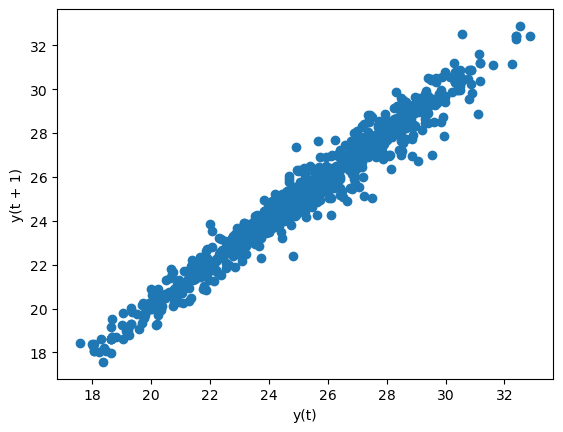

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(arcelor.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = arcelor.close[:-10], arcelor.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(arcelor.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    24.430764
2024-02-22    24.451154
2024-02-23    24.471178
2024-02-24    24.490841
2024-02-25    24.510151
2024-02-26    24.529114
2024-02-27    24.547735
2024-02-28    24.566022
2024-02-29    24.583980
2024-03-01    24.601615
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    24.360001
2024-02-22    24.355000
2024-02-23    24.305000
2024-02-24    24.305000
2024-02-25    24.305000
2024-02-26    24.040001
2024-02-27    24.370001
2024-02-28    24.100000
2024-02-29    24.129999
2024-03-01    24.084999
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.2827552130011444

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,24.360001,24.430764,0.070763
2024-02-22,24.355000,24.451154,0.096154
2024-02-23,24.305000,24.471178,0.166178
2024-02-24,24.305000,24.490841,0.185841
2024-02-25,24.305000,24.510151,0.205151
2024-02-26,24.040001,24.529114,0.489113
2024-02-27,24.370001,24.547735,0.177734
2024-02-28,24.100000,24.566022,0.466022
2024-02-29,24.129999,24.583980,0.453981
2024-03-01,24.084999,24.601615,0.516616
